# Decision trees

build one!

In [14]:
import os

import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3)

tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file=f"{os.getcwd()}/iris_tree.dot",
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

In [4]:
%%bash

dot -Tpng iris_tree.dot -o iris_tree.png

![tree](iris_tree.png "decision tree")

Decision Trees do not take much in the way of data prep and are intutative, these are the main advantages.

## Gini impurity

gini ($G_i$) gives the impurity of the $ith$ node. So $G = 0$ is best. 

$$G_i = 1 - \sum^{n}_{k=1}p_{i,k}^2$$

$p_{i,k}$ is the ratio of class k instances among training instances in the $i^{th}$ node

In [60]:
import itertools as it

In [113]:
1


SyntaxError: invalid syntax (<ipython-input-113-425d0c9dec68>, line 1)

In [ ]:
for x,y in it.product()

In [117]:
def calc_gini(classes):
    
    ps = [(k/(sum(classes)+1e-9))**2 
          for k in classes
         ]
    return 1- sum(ps)
        

In [118]:
gini_arr = np.array([calc_gini([x,y]) 
                     for x,y in it.product([x for x in range(51)],
                                           [x for x in range(51)]
                                          )
                    ]).reshape([51,51])

In [99]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'class 1')

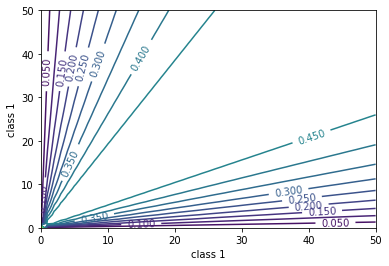

In [127]:
fig = plt.contour(gini_arr, levels=20)
fig.clabel(inline=1, fontsize=10)
plt.xlabel("class 1")
plt.ylabel("class 1")

we see the gini impurity is smallest where it is closest to either axis. This is beacause there are few of the other class 

## CART training

Splits the dataset at each node by identifing the purest subsets, by gini impurity. The cost function it tries to minimise is given below.

Essentially it is an average of the gini impurities of each subset wieghted by the ratio of the number of observations in that subset.


$$J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$

CART is a greedy approach. Therefore it will not always produce the best solution as it might be that a sub-optimial split higher up the tree leads to better splits futher down which the greedy approach will miss. 

Finding the optimal tree takes $O(e(m)) time - therefore intractable. This is why we settle for a reasonably good solution as the optimal is not fesiable. 